# Import Modules

---



In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.cuda import is_available

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Train

In [12]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Cuda

In [13]:
gpu = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(gpu)

# Collect Data

In [14]:
import numpy as np
import pandas as pd

In [15]:
reviews_df = pd.read_csv('/content/drive/MyDrive/review.tsv' , sep="\t" )
reviews = reviews_df['reviews'].tolist()

In [16]:
reviews

["The camera on this phone is incredible. The photos are clear, sharp, and full of detail. I'm able to take amazing photos with this phone, even in low-light conditions.",
 'Not the greatest but good enough for the price.',
 'Got the phone 2 years ago still in a pretty good condition although the screen to body ration is showing its age.',
 'Kinda meh. It’s a really average phone.',
 "I've only had this phone for a few months, and it's already cracked the screen. The phone is very fragile and not durable at all. I'm very disappointed with the quality of the phone.",
 "This phone is very affordable for the quality of the product. I was able to find it for a great price, and I'm very happy with the value for the money.",
 'This phone is not worth the money. There are much better phones on the market for a fraction of the price. I would not recommend this phone to anyone.',
 "I'm so disappointed with the battery life of this phone. It barely lasts a day on a single charge, even with moder

# Score

In [17]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [18]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt').to(gpu)
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [19]:
df['score'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [23]:
df

,review,score
0,The camera on this phone is incredible. The ph...,5
1,Not the greatest but good enough for the price.,3
2,Got the phone 2 years ago still in a pretty go...,4
3,Kinda meh. It’s a really average phone.,3
4,"I've only had this phone for a few months, and...",2
5,This phone is very affordable for the quality ...,5
6,This phone is not worth the money. There are m...,1
7,I'm so disappointed with the battery life of t...,2


# Values Graph

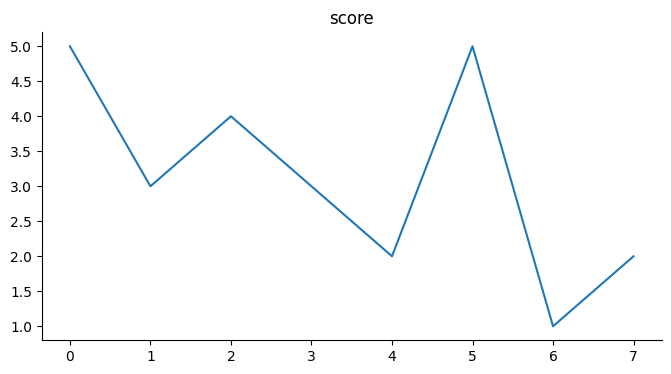

In [22]:
from matplotlib import pyplot as plt
df['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

# Faceted distributions Graph

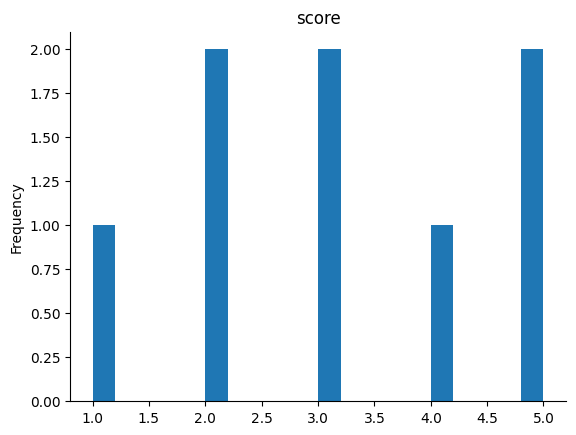

In [21]:
from matplotlib import pyplot as plt
df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)